# pi, pj and pij dynamics
I want to see how the dynamics of pi, pj behave with different training times and tau_z constant.
Also, it is probably obvious but it should be good to double check whether tau_p does not affect the ratio between them

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history, get_weights
from connectivity_functions import artificial_connectivity_matrix

## An example

epochs 0
epochs 1
epochs 2


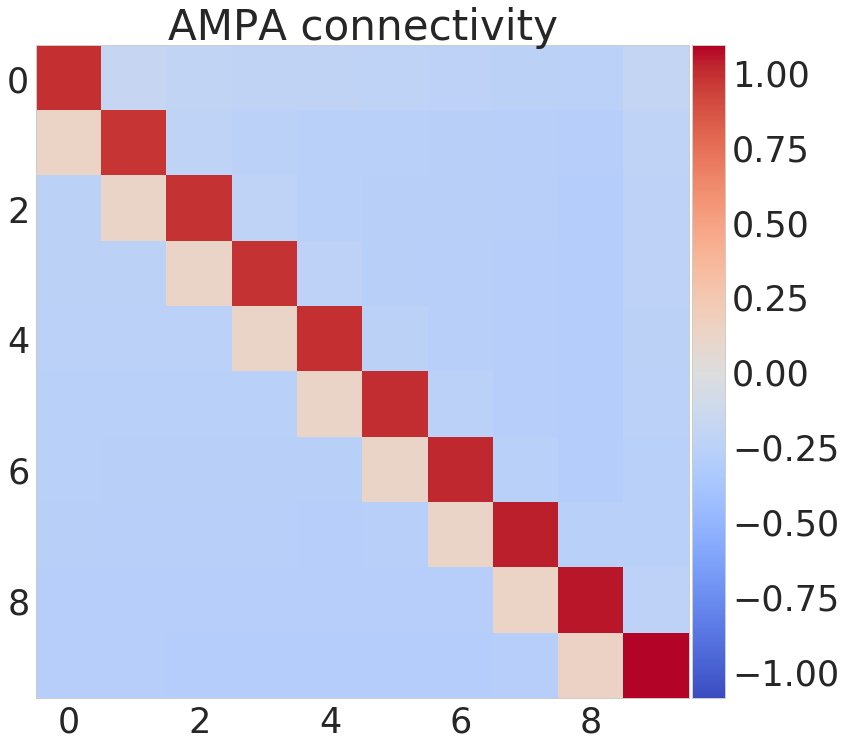

In [2]:
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'p_pre', 'p_post', 'p_co']
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                  diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                  always_learning=always_learning)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
training_time = np.linspace(0.100, 1.0, num=n_patterns)[::-1]
# training_time = np.random.normal(loc=0.100, scale=0.010, size=n_patterns)
training_time = 0.100
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

plot_weight_matrix(manager.nn, ampa=True)

[[-100.     -0.19   -0.21   -0.22   -0.22   -0.23   -0.23   -0.24   -0.25
    -0.19]
 [   0.13 -100.     -0.22   -0.25   -0.26   -0.26   -0.27   -0.28   -0.29
    -0.23]
 [  -0.24    0.13 -100.     -0.23   -0.26   -0.26   -0.27   -0.28   -0.29
    -0.23]
 [  -0.25   -0.25    0.13 -100.     -0.24   -0.27   -0.27   -0.28   -0.29
    -0.24]
 [  -0.25   -0.25   -0.25    0.12 -100.     -0.24   -0.28   -0.28   -0.29
    -0.24]
 [  -0.26   -0.26   -0.26   -0.26    0.12 -100.     -0.25   -0.28   -0.29
    -0.25]
 [  -0.26   -0.27   -0.27   -0.27   -0.27    0.12 -100.     -0.26   -0.29
    -0.26]
 [  -0.27   -0.28   -0.28   -0.28   -0.28   -0.28    0.12 -100.     -0.26
    -0.26]
 [  -0.28   -0.29   -0.29   -0.29   -0.29   -0.29   -0.29    0.13 -100.
    -0.24]
 [  -0.29   -0.29   -0.29   -0.29   -0.29   -0.29   -0.29   -0.29    0.14
  -100.  ]]
[1 2 3 4 5 6 7 8 9 0]


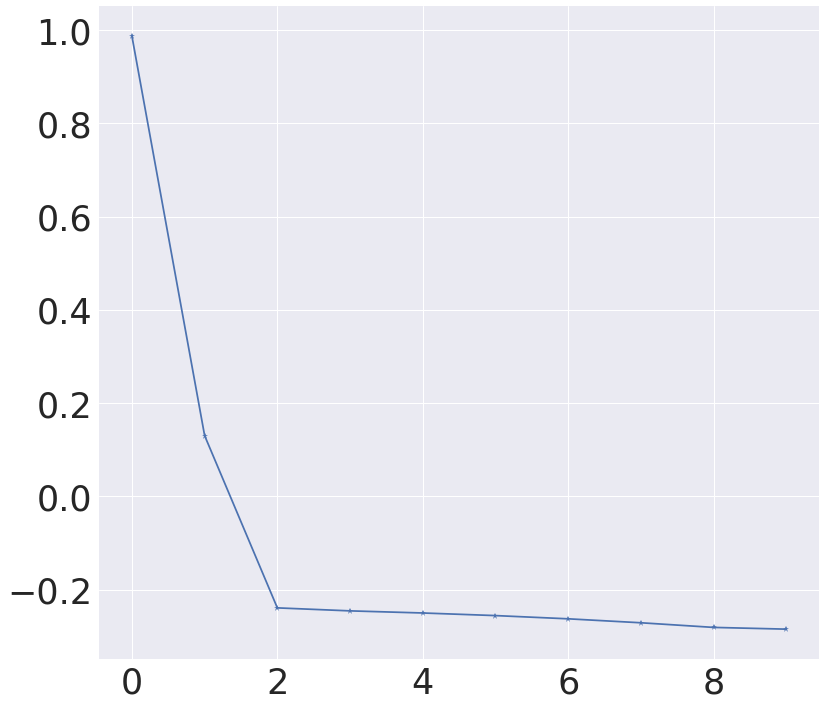

In [3]:
w_aux = np.copy(nn.w_ampa)
np.fill_diagonal(w_aux, -100)
print(w_aux)
print(w_aux.argmax(axis=0))
plt.plot(nn.w_ampa[:, 0], '*-')

In [4]:
print(nn.p_pre_ampa)
print(nn.p_post_ampa)
print(nn.p_co_ampa)

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
[[ 0.03  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.03  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.03  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.03  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.03  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.03  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.03  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.03  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.03  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.03]]


## Tau_z variation

In [5]:
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

from_pattern = 2
to_pattern = 3
pi_vector = []
pj_vector = []
pij_vector = []

tau_z_pre_vector = np.linspace(0.005, 0.500, num=10)

for tau_z_pre_ in tau_z_pre_vector:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                      diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi_vector.append(np.copy(nn.p_pre_ampa[from_pattern]))
    pj_vector.append(nn.p_post_ampa[to_pattern])
    pij_vector.append(nn.p_co[to_pattern, from_pattern])

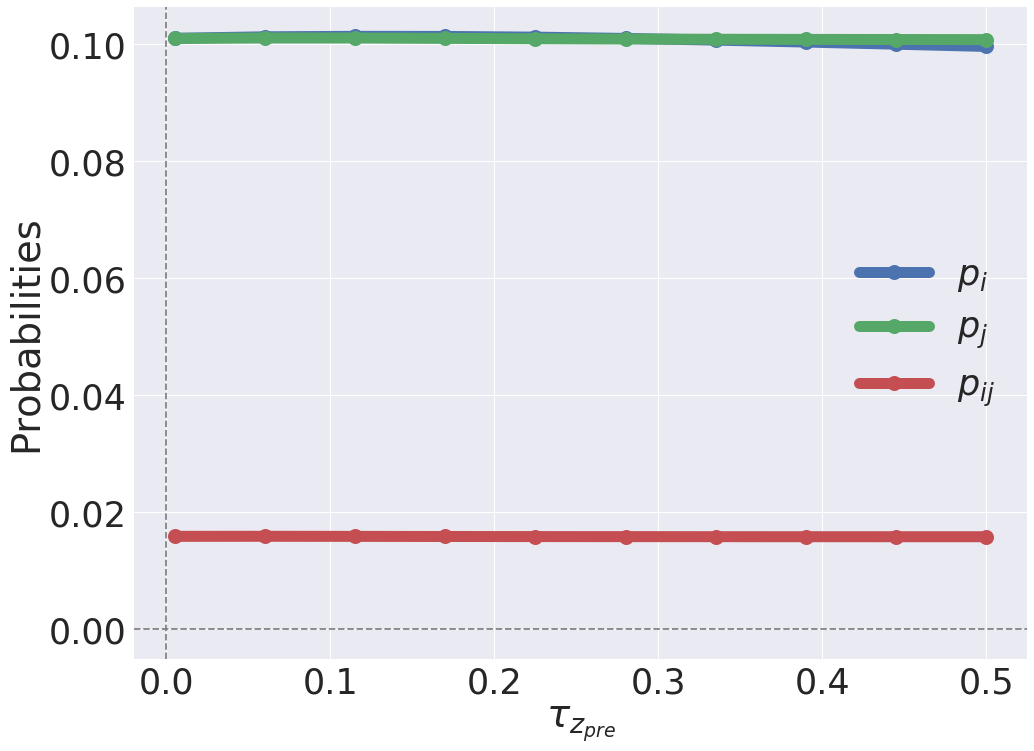

In [6]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_z_pre_vector, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax.plot(tau_z_pre_vector, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')
ax.plot(tau_z_pre_vector, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')

ax.set_xlabel(r'$\tau_{z_{pre}}$')
ax.set_ylabel('Probabilities')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

In [7]:
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

from_pattern = 2
to_pattern = 3
pi_vector = []
pj_vector = []
pij_vector = []

training_times = np.linspace(0.010, 1.0, num=10)

for training_time in training_times:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                      diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi_vector.append(np.copy(nn.p_pre_ampa[from_pattern]))
    pj_vector.append(nn.p_post_ampa[to_pattern])
    pij_vector.append(nn.p_co[to_pattern, from_pattern])

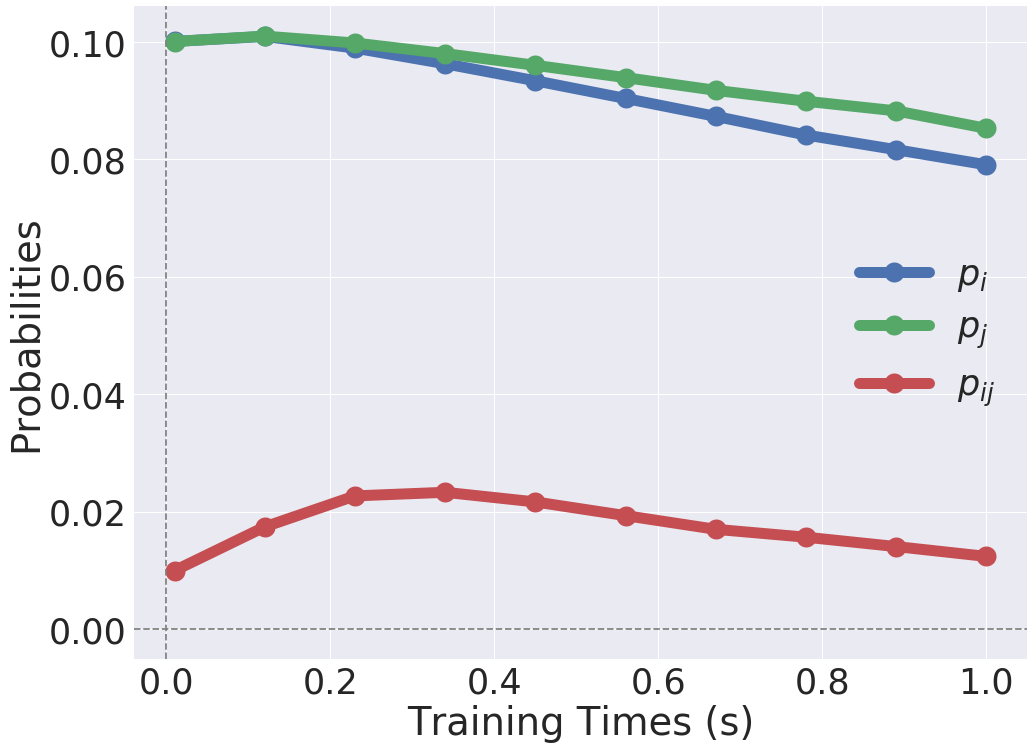

In [8]:
markersize = 20
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(training_times, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax.plot(training_times, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')
ax.plot(training_times, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.set_xlabel(r'Training Times (s)')
ax.set_ylabel('Probabilities')

ax.legend();

## Tau_p 

In [9]:
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.020
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = 0.0
epochs = 3

from_pattern = 2
to_pattern = 3
pi_vector = []
pj_vector = []
pij_vector = []

tau_p_vector = np.linspace(1.0, 30, num=15)

for tau_p_ in tau_p_vector:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p_, z_transfer=False,
                      diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi_vector.append(np.copy(nn.p_pre_ampa[from_pattern]))
    pj_vector.append(nn.p_post_ampa[to_pattern])
    pij_vector.append(nn.p_co[to_pattern, from_pattern])

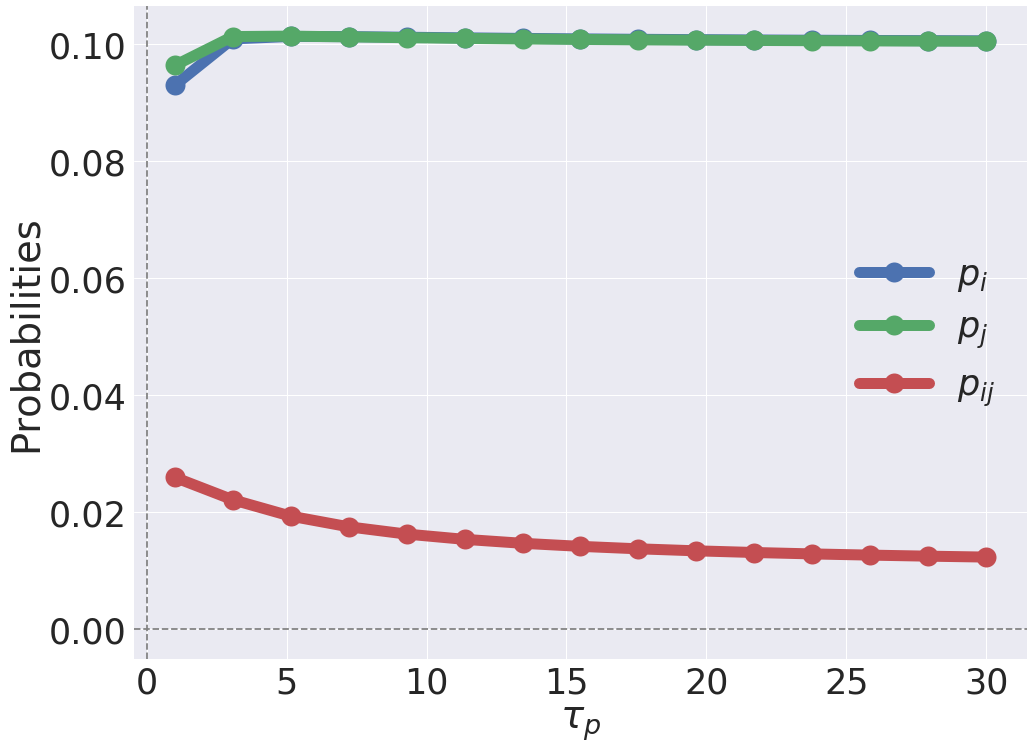

In [10]:
markersize = 20
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_p_vector, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax.plot(tau_p_vector, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')
ax.plot(tau_p_vector, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.set_xlabel(r'$\tau_p$')
ax.set_ylabel('Probabilities')

ax.legend();